## Import

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import glob
import math
import pickle

#Import Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

#Import Metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import cohen_kappa_score
from sklearn.model_selection import train_test_split

## Exploratory Data Analyst

In [4]:
# training/validation set
trainset = pd.read_csv("trainingData.csv")
testset = pd.read_csv("validationData.csv")

In [5]:
# Column Names
train.columns.values

array(['WAP001', 'WAP002', 'WAP003', 'WAP004', 'WAP005', 'WAP006',
       'WAP007', 'WAP008', 'WAP009', 'WAP010', 'WAP011', 'WAP012',
       'WAP013', 'WAP014', 'WAP015', 'WAP016', 'WAP017', 'WAP018',
       'WAP019', 'WAP020', 'WAP021', 'WAP022', 'WAP023', 'WAP024',
       'WAP025', 'WAP026', 'WAP027', 'WAP028', 'WAP029', 'WAP030',
       'WAP031', 'WAP032', 'WAP033', 'WAP034', 'WAP035', 'WAP036',
       'WAP037', 'WAP038', 'WAP039', 'WAP040', 'WAP041', 'WAP042',
       'WAP043', 'WAP044', 'WAP045', 'WAP046', 'WAP047', 'WAP048',
       'WAP049', 'WAP050', 'WAP051', 'WAP052', 'WAP053', 'WAP054',
       'WAP055', 'WAP056', 'WAP057', 'WAP058', 'WAP059', 'WAP060',
       'WAP061', 'WAP062', 'WAP063', 'WAP064', 'WAP065', 'WAP066',
       'WAP067', 'WAP068', 'WAP069', 'WAP070', 'WAP071', 'WAP072',
       'WAP073', 'WAP074', 'WAP075', 'WAP076', 'WAP077', 'WAP078',
       'WAP079', 'WAP080', 'WAP081', 'WAP082', 'WAP083', 'WAP084',
       'WAP085', 'WAP086', 'WAP087', 'WAP088', 'WAP089', 'WAP0

##### Training Scatter Plot of Longitude and Latitude

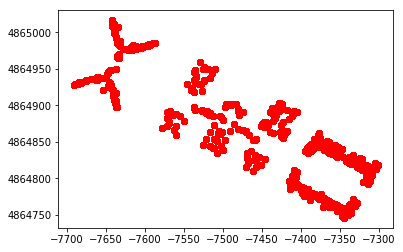

In [12]:
plt.scatter(trainset['LONGITUDE'], trainset['LATITUDE'], 
           color = 'red')

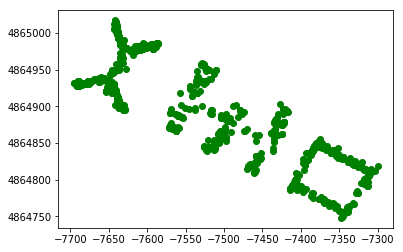

In [14]:
plt.scatter(testset['LONGITUDE'], testset['LATITUDE'], 
           color = 'green')

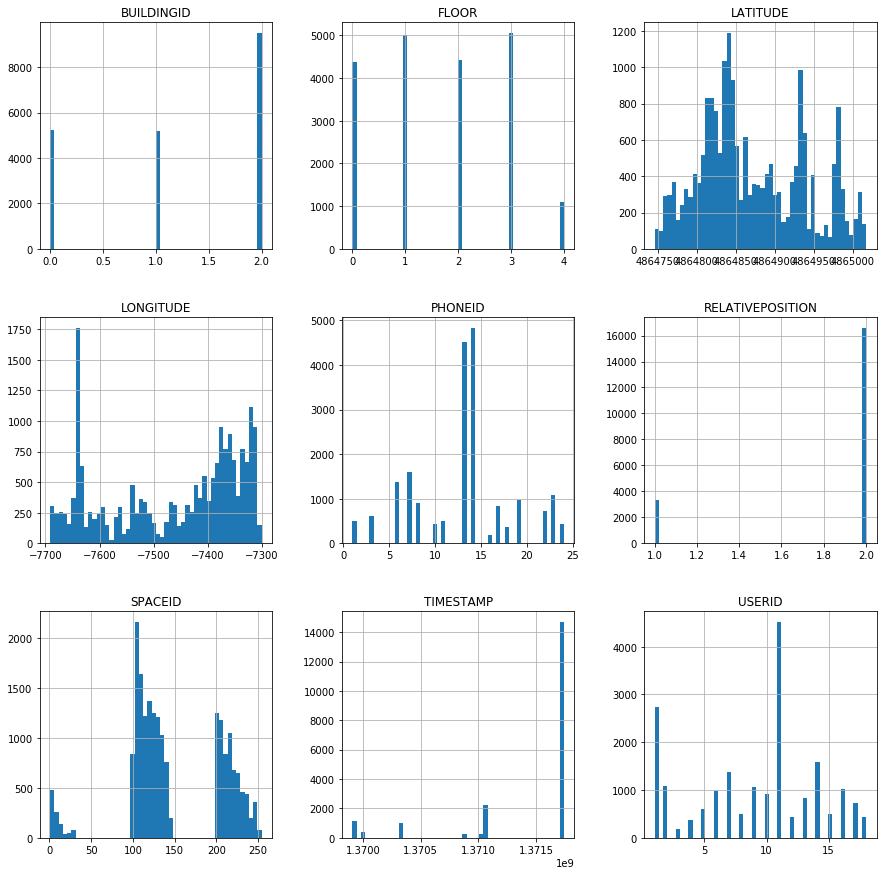

In [16]:
trainset.iloc[:, 520:529].hist(bins=50, figsize=(15,15))
plt.show()

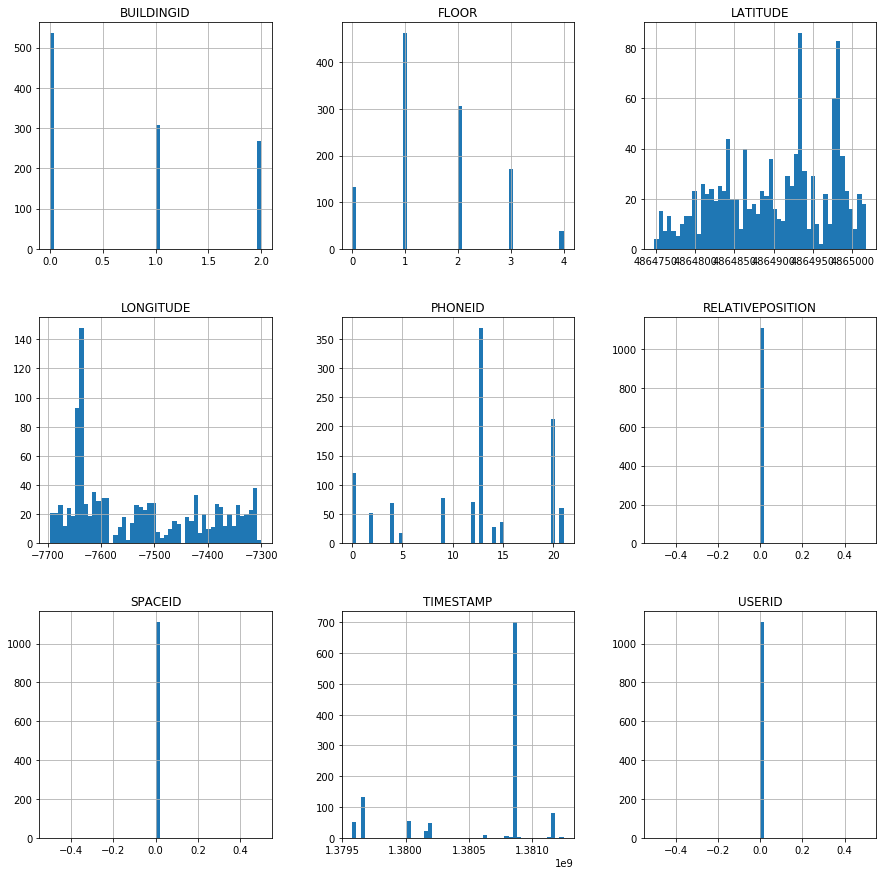

In [17]:
testset.iloc[:, 520:529].hist(bins=50, figsize=(15,15))
plt.show()

## Pre-Process Data

##### Copy train/test data set

In [18]:
trainsetData = trainset.copy(deep=True)
testsetData = testset.copy(deep=True)

##### Change value of 100 (no signal) to 0 so that the highest signal is 104

In [21]:
trainsetData.iloc[:, 0:520].min().min() # minimum WAP is -104

-104

In [22]:
trainsetData.iloc[:, 0:520] = np.where(trainsetData.iloc[:, 0:520] <= 0, 
                                      trainsetData.iloc[:, 0:520] + 105, 
                                      trainsetData.iloc[:, 0:520] - 100)

In [23]:
trainsetData.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,0,0,0,0,0,0,0,0,0,0,...,0,-7541.2643,4.864921e+06,2,1,106,2,2,23,1371713733
1,0,0,0,0,0,0,0,0,0,0,...,0,-7536.6212,4.864934e+06,2,1,106,2,2,23,1371713691
2,0,0,0,0,0,0,0,8,0,0,...,0,-7519.1524,4.864950e+06,2,1,103,2,2,23,1371714095
3,0,0,0,0,0,0,0,0,0,0,...,0,-7524.5704,4.864934e+06,2,1,102,2,2,23,1371713807
4,0,0,0,0,0,0,0,0,0,0,...,0,-7632.1436,4.864982e+06,0,0,122,2,11,13,1369909710


In [24]:
testsetData.iloc[:, 0:520].min().min()

-102

In [25]:
testsetData.iloc[:, 0:520] = np.where(testsetData.iloc[:, 0:520] <= 0, 
                                      testsetData.iloc[:, 0:520] + 105, 
                                      testsetData.iloc[:, 0:520] - 100)

In [26]:
testsetData.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,0,0,0,0,0,0,0,0,0,0,...,0,-7515.916799,4.864890e+06,1,1,0,0,0,0,1380872703
1,0,0,0,0,0,0,0,0,0,0,...,0,-7383.867221,4.864840e+06,4,2,0,0,0,13,1381155054
2,0,0,0,0,0,0,0,0,0,0,...,0,-7374.302080,4.864847e+06,4,2,0,0,0,13,1381155095
3,0,0,0,0,0,0,0,0,0,0,...,0,-7365.824883,4.864843e+06,4,2,0,0,0,13,1381155138
4,0,0,0,0,0,0,0,0,0,0,...,0,-7641.499303,4.864922e+06,2,0,0,0,0,2,1380877774


##### Create Dataset for each Building

In [27]:
trainsetDataB0 = trainsetData[trainsetData['BUILDINGID'] == 0]
trainsetDataB1 = trainsetData[trainsetData['BUILDINGID'] == 1]
trainsetDataB2 = trainsetData[trainsetData['BUILDINGID'] == 2]

In [28]:
testsetDataB0 = testsetData[testsetData['BUILDINGID'] == 0]
testsetDataB1 = testsetData[testsetData['BUILDINGID'] == 1]
testsetDataB2 = testsetData[testsetData['BUILDINGID'] == 2]

##### Create Unique Identifier to label and predict Floor, Latitude, and Longitude

In [95]:
trainsetDataB0['uniqueID'] = trainsetDataB0['FLOOR'].map(str) + trainsetDataB0['LONGITUDE'].map(str) + trainsetDataB0['LATITUDE'].map(str)
trainsetDataB1['uniqueID'] = trainsetDataB1['FLOOR'].map(str) + trainsetDataB1['LONGITUDE'].map(str) + trainsetDataB1['LATITUDE'].map(str)
trainsetDataB2['uniqueID'] = trainsetDataB2['FLOOR'].map(str) + trainsetDataB2['LONGITUDE'].map(str) + trainsetDataB2['LATITUDE'].map(str)

In [31]:
trainsetDataB0.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP,uniqueID
4,0,0,0,0,0,0,0,0,0,0,...,-7632.1436,4.864982e+06,0,0,122,2,11,13,1369909710,0-7632.1435999982064864982.217100002
7119,0,0,0,0,0,0,0,0,0,0,...,-7637.2570,4.864950e+06,0,0,102,2,11,13,1369908951,0-7637.2569999992854864949.814300002
7120,0,0,0,0,0,0,0,0,0,0,...,-7628.1345,4.864977e+06,0,0,110,2,11,13,1369909107,0-7628.1345000006264864977.021200001
7121,0,0,0,0,0,0,0,0,0,0,...,-7622.0546,4.864976e+06,0,0,111,2,11,13,1369909166,0-7622.0546000003814864976.294200003
7122,0,0,0,0,0,0,0,0,0,0,...,-7636.2057,4.864967e+06,0,0,107,2,11,13,1369909011,0-7636.2056999988854864967.330200002


##### Convert data to categorical

In [33]:
trainsetDataB0['uniqueID'] = pd.Categorical(trainsetDataB0['uniqueID'])
trainsetDataB1['uniqueID'] = pd.Categorical(trainsetDataB1['uniqueID'])
trainsetDataB2['uniqueID'] = pd.Categorical(trainsetDataB2['uniqueID'])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [34]:
trainsetDataB0.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP,uniqueID
4,0,0,0,0,0,0,0,0,0,0,...,-7632.1436,4.864982e+06,0,0,122,2,11,13,1369909710,0-7632.1435999982064864982.217100002
7119,0,0,0,0,0,0,0,0,0,0,...,-7637.2570,4.864950e+06,0,0,102,2,11,13,1369908951,0-7637.2569999992854864949.814300002
7120,0,0,0,0,0,0,0,0,0,0,...,-7628.1345,4.864977e+06,0,0,110,2,11,13,1369909107,0-7628.1345000006264864977.021200001
7121,0,0,0,0,0,0,0,0,0,0,...,-7622.0546,4.864976e+06,0,0,111,2,11,13,1369909166,0-7622.0546000003814864976.294200003
7122,0,0,0,0,0,0,0,0,0,0,...,-7636.2057,4.864967e+06,0,0,107,2,11,13,1369909011,0-7636.2056999988854864967.330200002


In [35]:
#Save the processed file
trainsetDataB0.to_csv('trainsetDataB0.csv')
trainsetDataB1.to_csv('trainsetDataB1.csv')
trainsetDataB2.to_csv('trainsetDataB2.csv')

In [36]:
# Load the saved data set
trainsetDataB0 = pd.read_csv('trainsetDataB0.csv', header = 0)
trainsetDataB1 = pd.read_csv('trainsetDataB1.csv', header = 0)
trainsetDataB2 = pd.read_csv('trainsetDataB2.csv', header = 0)

In [37]:
del trainsetDataB0['Unnamed: 0']
del trainsetDataB1['Unnamed: 0']
del trainsetDataB2['Unnamed: 0']

In [38]:
trainsetDataB0.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP,uniqueID
0,0,0,0,0,0,0,0,0,0,0,...,-7632.1436,4.864982e+06,0,0,122,2,11,13,1369909710,0-7632.1435999982064864982.217100002
1,0,0,0,0,0,0,0,0,0,0,...,-7637.2570,4.864950e+06,0,0,102,2,11,13,1369908951,0-7637.2569999992854864949.814300002
2,0,0,0,0,0,0,0,0,0,0,...,-7628.1345,4.864977e+06,0,0,110,2,11,13,1369909107,0-7628.1345000006264864977.021200001
3,0,0,0,0,0,0,0,0,0,0,...,-7622.0546,4.864976e+06,0,0,111,2,11,13,1369909166,0-7622.0546000003814864976.294200003
4,0,0,0,0,0,0,0,0,0,0,...,-7636.2057,4.864967e+06,0,0,107,2,11,13,1369909011,0-7636.2056999988854864967.330200002


In [39]:
trainsetDataB0.dtypes

WAP001                int64
WAP002                int64
WAP003                int64
WAP004                int64
WAP005                int64
WAP006                int64
WAP007                int64
WAP008                int64
WAP009                int64
WAP010                int64
WAP011                int64
WAP012                int64
WAP013                int64
WAP014                int64
WAP015                int64
WAP016                int64
WAP017                int64
WAP018                int64
WAP019                int64
WAP020                int64
WAP021                int64
WAP022                int64
WAP023                int64
WAP024                int64
WAP025                int64
WAP026                int64
WAP027                int64
WAP028                int64
WAP029                int64
WAP030                int64
                     ...   
WAP501                int64
WAP502                int64
WAP503                int64
WAP504                int64
WAP505              

## Train Models

In [40]:
# Ind/Dep variables for Building 0
X_B0 = trainsetDataB0.iloc[:, 0:520]
y_B0 = trainsetDataB0.iloc[:, -1]

# Ind/Dep variables for Building 1
X_B1 = trainsetDataB1.iloc[:, 0:520]
y_B1 = trainsetDataB1.iloc[:, -1]

# Ind/Dep variables for Building 2
X_B2 = trainsetDataB2.iloc[:, 0:520]
y_B2 = trainsetDataB2.iloc[:, -1]



##### Partition Data

In [41]:
# Building 0
X_train_B0, X_test_B0, y_train_B0, y_test_B0 = train_test_split(X_B0, y_B0)

# Building 1
X_train_B1, X_test_B1, y_train_B1, y_test_B1 = train_test_split(X_B1, y_B1)

# Building 2
X_train_B2, X_test_B2, y_train_B2, y_test_B2 = train_test_split(X_B2, y_B2)

##### Models

In [43]:
modelknn = KNeighborsClassifier()
modelRF = RandomForestClassifier()
modelDT = DecisionTreeClassifier()

### k-Nearest Neighbor

In [69]:
modelknn.fit(X_train_B0, y_train_B0)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [70]:
print(cross_val_score(modelknn, X_train_B0, y_train_B0))
modelknn.score(X_train_B0, y_train_B0)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


[0.65926986 0.65041889 0.65660685]


0.8033536585365854

In [71]:
knn_pred = modelknn.predict(X_test_B0)

In [73]:
knn_cm = confusion_matrix(y_test_B0, knn_pred)
print(knn_cm)

[[1 0 0 ... 0 0 0]
 [2 2 0 ... 0 0 0]
 [1 0 5 ... 0 0 0]
 ...
 [0 0 0 ... 6 0 1]
 [0 0 0 ... 0 4 2]
 [0 0 0 ... 0 0 7]]


In [74]:
# Accuracy
print('Accuracy:\n',accuracy_score(y_test_B0, knn_pred)*100)
print('Kappa:\n', cohen_kappa_score(y_test_B0, knn_pred)*100)

Accuracy:
 68.54531607006854
Kappa:
 68.40747194641024


### Random Forest

In [65]:
modelRF.fit(X_train_B0, y_train_B0)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [66]:
print(cross_val_score(modelRF, X_train_B0, y_train_B0))
modelRF.score(X_train_B0, y_train_B0)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


[0.69148175 0.69306931 0.67699837]


0.9961890243902439

In [67]:
RF_pred = modelRF.predict(X_test_B0)
print(RF_pred)

['2-7638.8079999983314864907.044100001'
 '1-7676.6435999982064864934.006999998'
 '0-7638.0676999986174865000.620200002' ...
 '0-7638.8431999981414864999.3684' '3-7596.64869999885654864983.354699999'
 '2-7637.0023000016814864905.532300003']


In [68]:
RF_cm = confusion_matrix(y_test_B0, RF_pred)
print(RF_cm)

[[1 1 0 ... 0 0 0]
 [1 3 0 ... 0 0 0]
 [1 1 4 ... 0 0 0]
 ...
 [0 0 0 ... 6 0 1]
 [0 0 0 ... 0 4 2]
 [0 0 0 ... 0 1 6]]


In [59]:
# Accuracy
print('Accuracy:\n',accuracy_score(y_test_B0, RF_pred)*100)
print('Kappa:\n', cohen_kappa_score(y_test_B0, RF_pred)*100)

Accuracy:
 73.41964965727342
Kappa:
 73.3038351519671


### Decision Tree

In [76]:
modelDT.fit(X_train_B0, y_train_B0)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [75]:
print(cross_val_score(modelDT, X_train_B0, y_train_B0))
modelDT.score(X_train_B0, y_train_B0)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


[0.59914102 0.5727342  0.58809135]


1.0

In [56]:
DT_pred = modelDT.predict(X_test_B0)

In [77]:
DT_cm = confusion_matrix(y_test_B0, DT_pred)
print(DT_cm)

[[1 1 0 ... 0 0 0]
 [0 4 0 ... 0 0 0]
 [0 0 5 ... 0 0 0]
 ...
 [0 0 0 ... 2 4 1]
 [0 0 0 ... 1 2 2]
 [0 0 0 ... 2 0 5]]


In [60]:
# Accuracy
print('Accuracy:\n',accuracy_score(y_test_B0, DT_pred)*100)
print('Kappa:\n', cohen_kappa_score(y_test_B0, DT_pred)*100)

Accuracy:
 66.03198781416603
Kappa:
 65.88261271564492


Best Model after training these three classifiers was determined to be Random Forest. Random Forest gave us the highest accuracy out of the three models. I will go ahead and use this model to predict the locations of the other two buildings. 

### Random Forest Building 1

In [78]:
modelRF.fit(X_train_B1, y_train_B1)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [79]:
print(cross_val_score(modelRF, X_train_B1, y_train_B1))
modelRF.score(X_train_B1, y_train_B1)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


[0.7958153  0.81860108 0.79752066]


0.9640749294328971

In [82]:
RF_predB1 = modelRF.predict(X_test_B1)
print(RF_predB1)

['0-7468.8702451959254864827.937682956'
 '2-7537.3398999981584864895.785400003'
 '1-7435.1372999995954864861.7101000035' ...
 '3-7417.5584000013774864893.060199998'
 '0-7425.6611000001434864873.132700004' '2-7432.4422000013294864883.1646']


In [84]:
RF_cmB1 = confusion_matrix(y_test_B1, RF_predB1)
print(RF_cmB1)

[[10  0  0 ...  0  0  0]
 [ 0  2  0 ...  0  0  0]
 [ 0  0  6 ...  0  0  0]
 ...
 [ 0  0  0 ...  2  0  0]
 [ 0  0  0 ...  0  3  0]
 [ 0  0  0 ...  0  0  5]]


In [85]:
# Accuracy
print('Accuracy:\n',accuracy_score(y_test_B1, RF_predB1)*100)
print('Kappa:\n', cohen_kappa_score(y_test_B1, RF_predB1)*100)

Accuracy:
 82.7559661277906
Kappa:
 82.66650463575212


### Random Forest Building 2

In [86]:
modelRF.fit(X_train_B2, y_train_B2)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [88]:
RF_predB2 = modelRF.predict(X_test_B2)
print(RF_predB2)

['2-7410.8652999997154864797.881499998'
 '4-7330.7868999987844864821.437299997'
 '0-7333.18320000171754864822.766999997' ...
 '2-7410.8652999997154864797.881499998'
 '4-7366.0958999991424864845.581600003'
 '3-7372.8029999993744864849.302699998']


In [89]:
RF_cmB2 = confusion_matrix(y_test_B2, RF_predB2)
print(RF_cmB2)

[[6 0 0 ... 0 0 0]
 [0 4 0 ... 0 0 0]
 [1 0 5 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 5]]


In [90]:
# Accuracy
print('Accuracy:\n',accuracy_score(y_test_B2, RF_predB2)*100)
print('Kappa:\n', cohen_kappa_score(y_test_B2, RF_predB2)*100)

Accuracy:
 74.84197218710493
Kappa:
 74.76444780123374


In [91]:
print("X=%s, Predicted=%s" % (y_test_B2, RF_predB2))

X=1064     2-7410.8652999997154864797.881499998
6663    4-7338.8579999990764864825.9152000025
4277    0-7333.18320000171754864822.766999997
6021    1-7332.10880000144154864822.170999996
5289     2-7366.2424000017344864841.108000003
3147           0-7370.3999000005424864772.489
3562     0-7333.0690999999644864769.216300003
1687     4-7314.1094999983914864816.739699997
3955     0-7307.7743000015634864814.599399999
3606    0-7357.69819999858654864840.922600001
8385           1-7324.0806999988854864817.717
3282     0-7314.6116999983794864800.712399997
8342     1-7359.3310999982064864837.273500003
3882    0-7333.18320000171754864822.766999997
6356          4-7337.7160999998454864825.2817
704      4-7398.110800001774864785.8972999975
434      3-7331.4004999995224864768.478600003
6481      4-7325.234099999074864818.356799996
334      3-7398.110800001774864785.8972999975
699     4-7384.3933999985474864778.2870000005
3408     0-7408.3388701938084864811.529825352
4514    3-7316.96389999985748647

In [93]:
test_predictions = pd.DataFrame(RF_predB2, columns=['uniqueID']).to_csv('test_predictions.csv')